In [15]:
import geopandas as gp
import pyrosm as osm
import geoplot as gplt
import matplotlib.pyplot as plt

In [31]:
ktm_boundary = gp.read_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/KTM_Boundary_only.geojson")
jn_boundary = gp.read_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/JN_Boundary.geojson")

In [7]:
data_path = "/home/nweiss/gdrive/Year 3/Group Project/GIS/Data/planet_85.248,27.649_85.408,27.756.osm.pbf"

In [8]:
fp = osm.get_data('test_pbf') 
## note: could not figure out how to add in own file path, so replaced their test data with a downloaded KTM dataset

In [9]:
osm_data = osm.OSM(fp)

In [37]:
district_boundaries = osm_data.get_boundaries()

<Axes: >

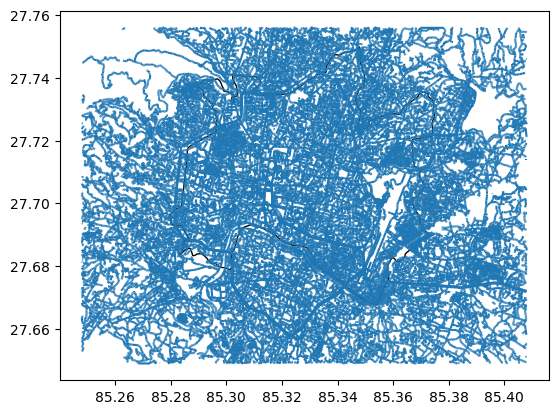

In [30]:
fig, ax = plt.subplots()
walk_net = osm_data.get_network(network_type="walking")
walk_net.plot(ax = ax)
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")

In [23]:
custom_filter = {'amenity': True}
pois_amenity = osm_data.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity")
pois_amenity["poi_type"] = pois_amenity["amenity"]

<Axes: >

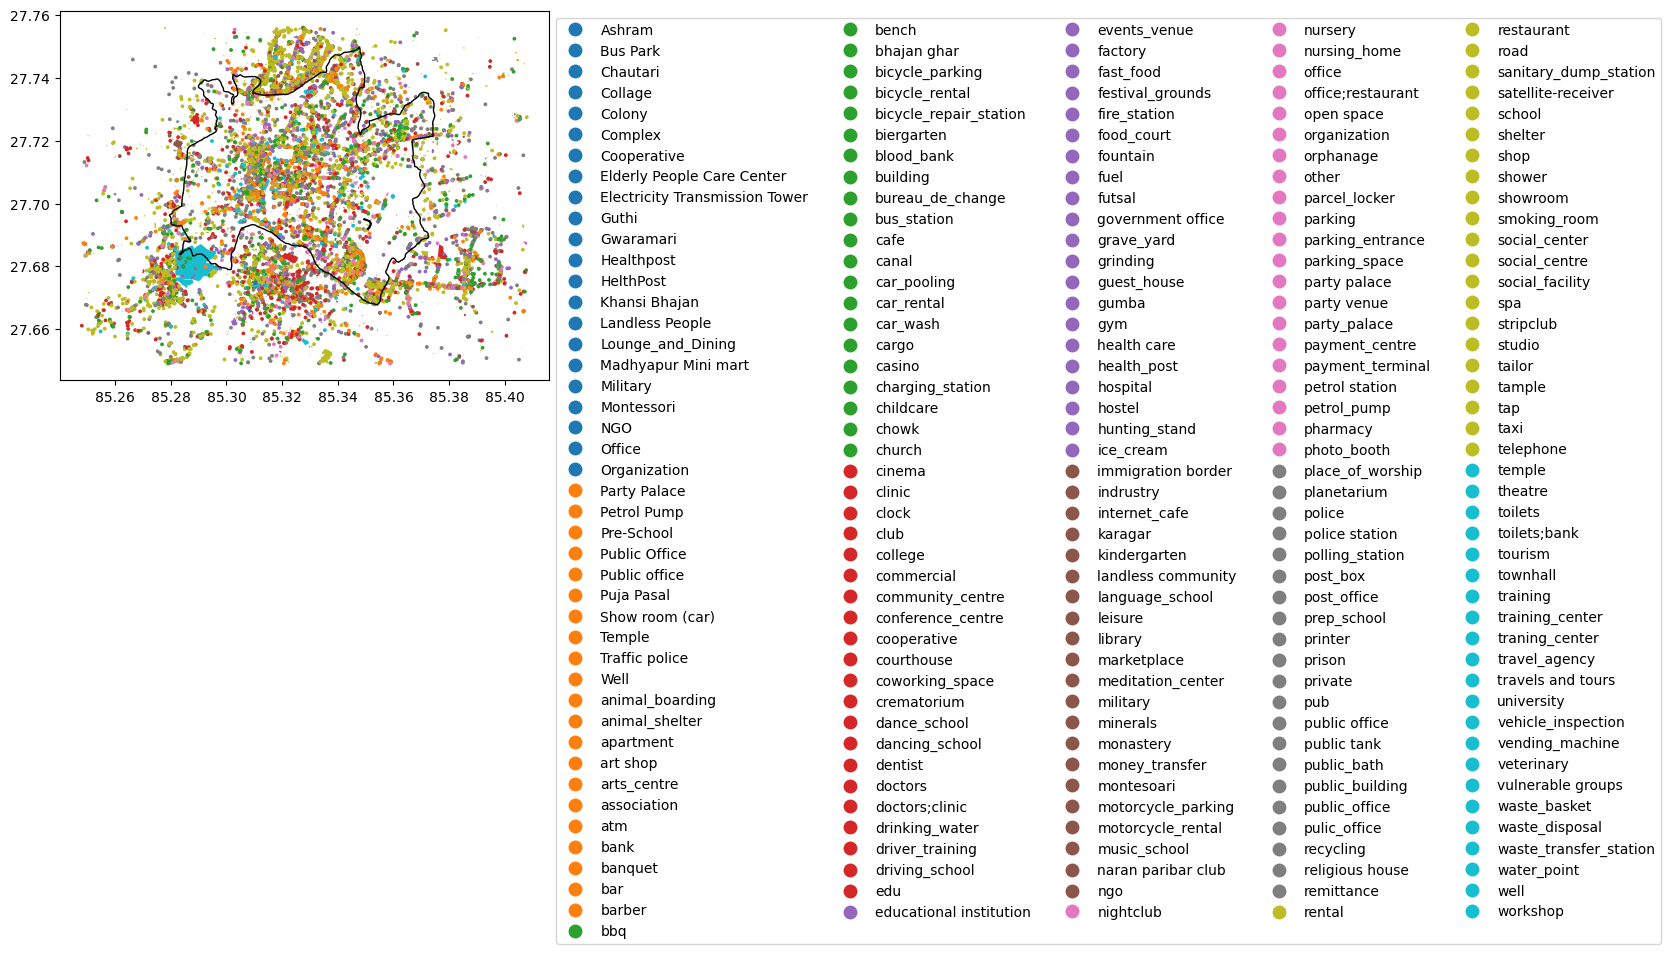

In [40]:
fig, ax = plt.subplots()
pois_amenity.plot(ax = ax, column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")
jn_boundary.plot(ax = ax, facecolor="black", edgecolor="black")

<Axes: >

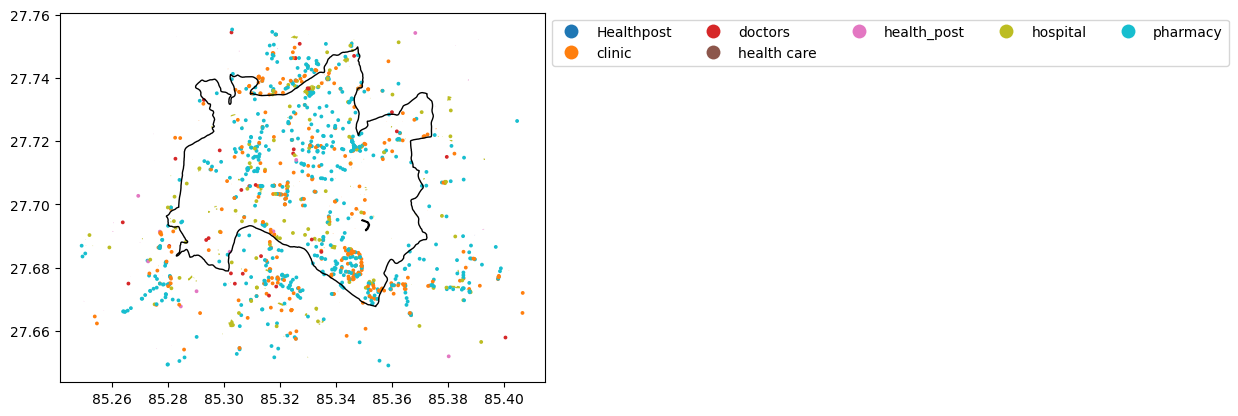

In [33]:
health_list = ['Healthpost','Helthpost', 'hospital', 'doctors', 'doctors; clinic','health care', 'health_post','clinic','pharmacy']
mask = pois_amenity['poi_type'].isin(health_list)
pois_health = pois_amenity[mask]

fig, ax = plt.subplots()
pois_health.plot(ax = ax, column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")
jn_boundary.plot(ax = ax, facecolor="black", edgecolor="black")

<Axes: >

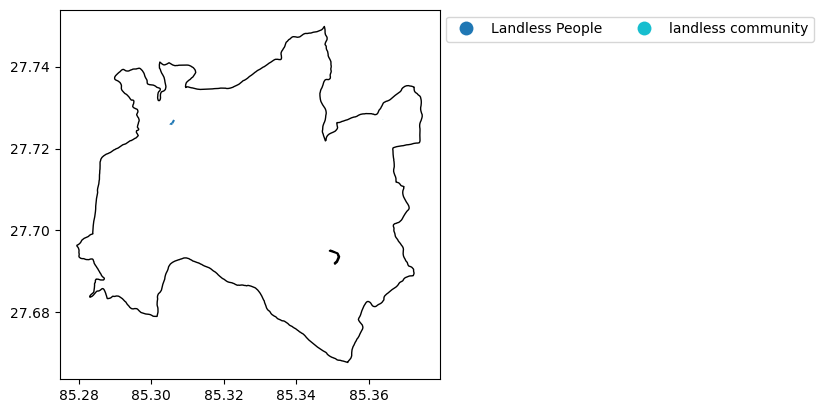

In [34]:
landless_list = ['Landless People', 'landless community']
mask = pois_amenity['poi_type'].isin(landless_list)
pois_landless = pois_amenity[mask]

fig, ax = plt.subplots()
pois_landless.plot(ax = ax, column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")
jn_boundary.plot(ax = ax, facecolor="black", edgecolor="black")

<Axes: >

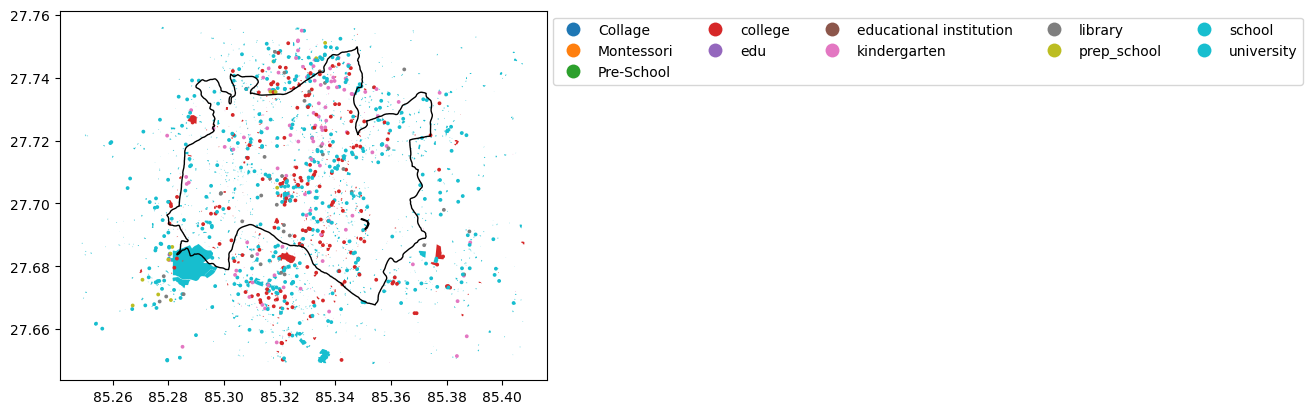

In [35]:
school_list = ['Collage','Pre-School','Montessori','college','edu','educational institution','kindergarten','library','prep_school','school','university']
mask = pois_amenity['poi_type'].isin(school_list)
pois_school = pois_amenity[mask]

fig, ax = plt.subplots()
pois_school.plot(ax = ax, column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")
jn_boundary.plot(ax = ax, facecolor="black", edgecolor="black")

BUFFERS

In [152]:
pois_school_project = pois_school.to_crs(32645)
pois_school_buffer = pois_school_project.buffer(250)
pois_school_buffer.to_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/Data/pois_school_buffer.geojson")

In [170]:
pois_school_project.centroid.to_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/Data/pois_school_centroid.geojson")

In [154]:
pois_health_project = pois_health.to_crs(32645)
pois_health_buffer = pois_health_project.buffer(250)
pois_health_buffer.to_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/Data/pois_health_buffer.geojson")

Additional OSM attributes

<Axes: >

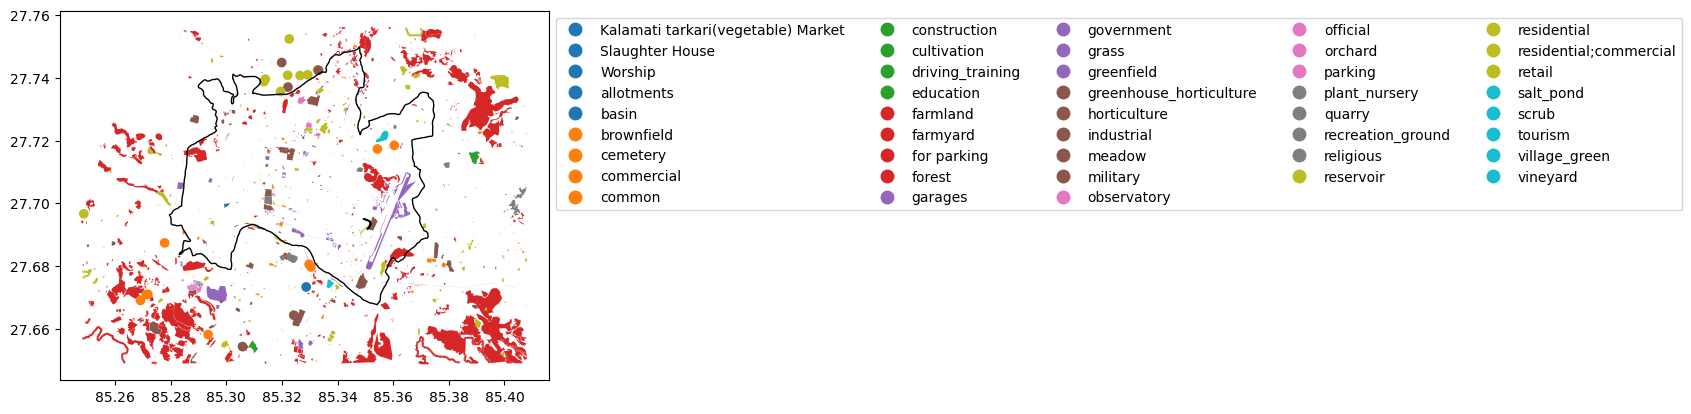

In [36]:
landuse = osm_data.get_landuse()

# plot
fig, ax = plt.subplots()
landuse.plot(ax = ax, column='landuse', legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)),figsize=(10,6))
ktm_boundary.plot(ax = ax, facecolor="none", edgecolor="black")
jn_boundary.plot(ax = ax, facecolor="black", edgecolor="black")

In [89]:
pois.to_file("/home/nweiss/gdrive/Year 3/Group Project/GIS/Data/osm_data.geojson")

<Axes: >

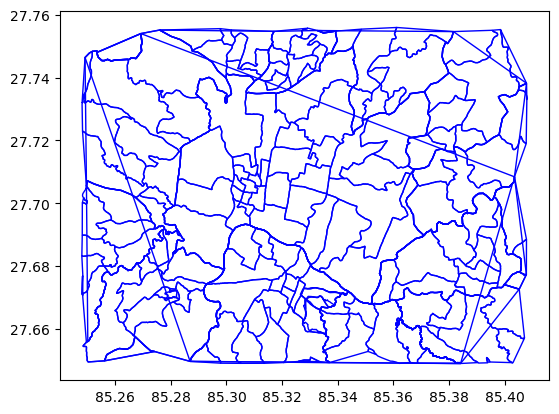

In [88]:
boundaries = osm_data.get_boundaries()
boundaries.plot(facecolor="none", edgecolor="blue")